In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from walkingAnt import *

In [2]:
landscape = multivariate_normal(mean=[2, 3], cov=[[1, 0], [0, 2]])

In [3]:
x, y = np.mgrid[0:6:.01, 0:6:.01]

pos = np.dstack((x, y))

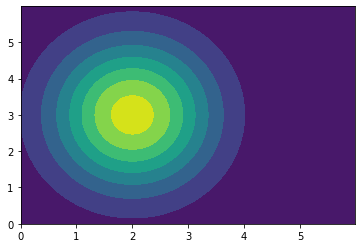

In [4]:
plt.contourf(x, y, landscape.pdf(pos))

In [6]:
x0, y0 = 1, 1
x1, y1 = 1.3, 1.1

duration = 1000
xt, yt = np.zeros(duration), np.zeros(duration)
change = []
potential = []
for t in range(duration):
    xt[t], yt[t] = x1, y1
    p0, p1 = [landscape.pdf(xy) for xy in ([x0, y0], [x1, y1])]
    s = ant_step([x1, y1], [x0, y0], p0, p1)
    x0, y0 = x1, y1
    x1 += s[0]
    y1 += s[1]

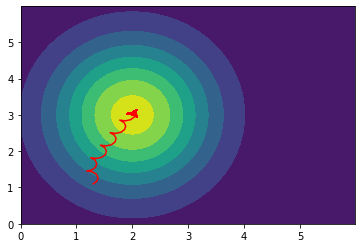

In [7]:
plt.contourf(x, y, landscape.pdf(pos))
plt.plot(xt, yt, c='r')